# Analyse


## importation

In [31]:
# importation of the libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [32]:
#importation of the dataset
dataset = pd.read_csv('merged_data.csv')

In [33]:
dataset.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420


## Analyse dataset


In [34]:
#transformation en array numpy
dataset.set_index('Zone', inplace=True)
X = dataset.values
X.shape

(172, 14)

In [35]:
# preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [38]:
#new dataframe with the scaled values
df_scaled = pd.DataFrame( X_scaled, columns=dataset.columns, index=dataset.index)
df_scaled

,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
Zone,,,,,,,,,,,,,,
Afghanistan,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.042889,-0.262225,-0.215874,0.517105,0.675786,-0.236585,-0.343623,-0.733341
Afrique du Sud,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,0.092833,-0.065617,-0.074806,-0.310261,-0.094335,-0.040670,4.858061,0.447184
Albanie,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.261814,-0.262225,-0.215874,-0.124279,-0.263137,-0.239842,-0.283708,0.713507
Algérie,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.009518,-0.262225,-0.215874,-0.319260,0.382345,-0.154789,-0.332729,0.544199
Allemagne,0.488365,1.187237,4.066801,0.452851,-0.218209,0.326547,0.260891,10.341404,11.333612,7.942644,7.526523,1.751611,0.832884,0.677595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.218549,-0.252540,-0.198011,-0.283400,-0.302762,-0.035437,0.478842,-0.733341
Équateur,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.170729,-0.262225,-0.215874,-0.192301,0.274144,-0.190418,-0.343623,0.282095
États-Unis d'Amérique,8.107025,7.856348,0.186264,8.235288,-0.218209,8.594853,1.849341,1.959452,3.140760,-0.110915,-0.045837,10.372571,-0.343623,-0.029455


## Analyse ACP


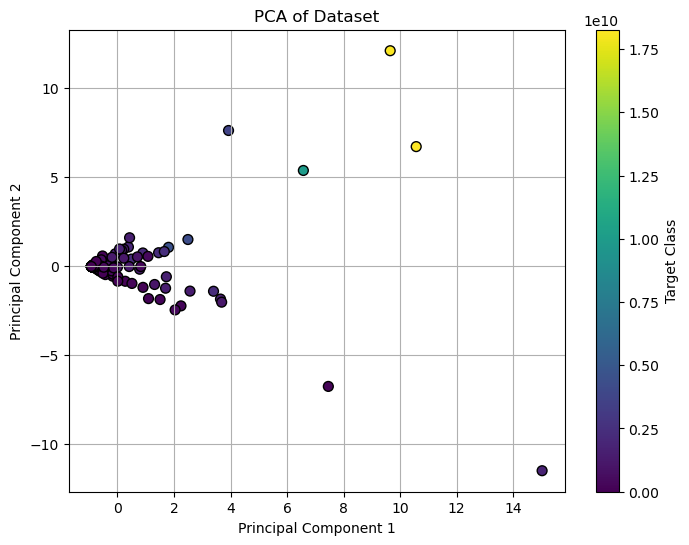

In [36]:
# Acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:11].values
# Standardization of the data
sc = StandardScaler()
X_std = sc.fit_transform(X)
# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)
# Explained variance
explained_variance = pca.explained_variance_ratio_
# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['Disponibilité intérieure_dispo'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.grid()
plt.show()
